# Calculating metrics

xarray is built on top of [numpy](http://numpy.org), which means it implements many of the numpy operators as native methods, and those it doesn't can still be used on the underlying numpy arrays contained with an `xarray.DataArray` object.

This is intended as a short introduction with a focus on climate data. The [xarray documentation on computation](http://xarray.pydata.org/en/stable/computation.html) is excellent and contains many more examples and much more detail.

In [1]:
import xarray

In [2]:
%matplotlib inline

Load a CMIP5 air temperature data set into the variable `ds`, and make a variable, `tas`, which directly references the near surface air temperature `DataArray`

In [3]:
ds = xarray.open_dataset('http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc')
tas = ds.tas

In [4]:
tas

<xarray.DataArray 'tas' (time: 1872, lat: 145, lon: 192)>
[52116480 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-02-05T23:49:51Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

It is straightforward to calculate the mean temperature for all locations and times in the data

In [5]:
tas.mean()

<xarray.DataArray 'tas' ()>
array(277.5926, dtype=float32)
Coordinates:
    height   float64 1.5

It is possible to specify a dimension along which to compute an operator. For example, to calculate the mean in time for all locations specify the `time` dimension as the dimension along which the mean should be calculated:

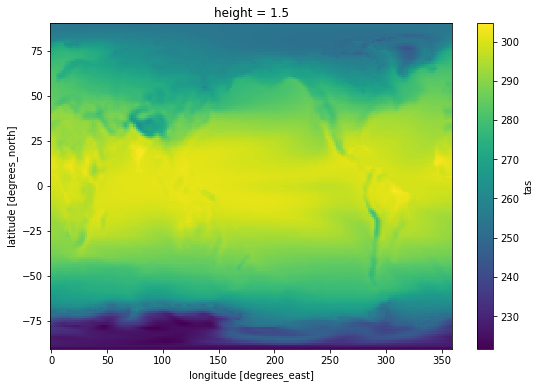

In [6]:
tas.mean(dim='time').plot(size=6)

It is common to calculate a 30-year climatology, which is simple using `sel` and chaining operators

In [7]:
tas_clim = tas.sel(time=slice('1960-01','1989-12')).mean(dim='time')
tas_clim

<xarray.DataArray 'tas' (lat: 145, lon: 192)>
array([[223.5951 , 223.5951 , 223.5951 , ..., 223.58675, 223.58675,
        223.58675],
       [227.05313, 227.00461, 226.95636, ..., 227.20116, 227.1515 ,
        227.10295],
       [228.13997, 228.0243 , 227.9114 , ..., 228.49681, 228.37773,
        228.25885],
       ...,
       [255.42877, 255.46603, 255.50294, ..., 255.29857, 255.34636,
        255.38702],
       [254.99307, 255.0079 , 255.0223 , ..., 254.94296, 254.95801,
        254.97554],
       [254.3218 , 254.3218 , 254.3218 , ..., 254.3218 , 254.3218 ,
        254.3218 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 1.5

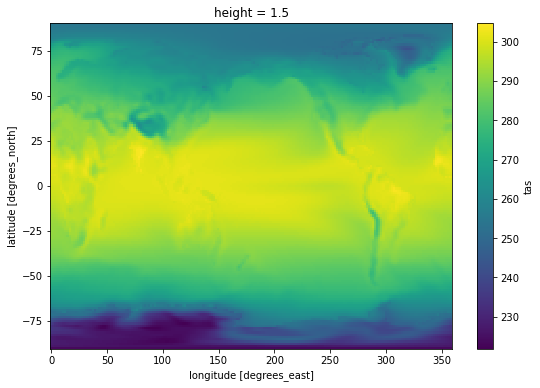

In [8]:
tas_clim.plot(size=6)

The anomaly from the 30 year climatology can now be calculated by subtracting it from the original data. xarray checks which named coordinates match between the two data sets, and *broadcasts* the `tas_clim` data along the missing `time` dimension automatically.

In [9]:
tas_anom = (tas - tas_clim)

The mean global anomaly in time can be calculated by specifying both `lat` and `lon` dimensions in the `dim` argument to `mean`

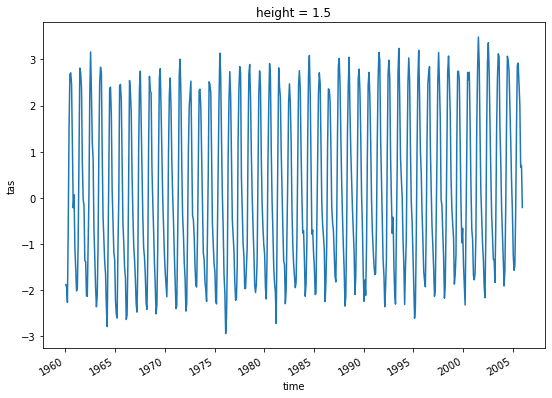

In [10]:
tas_anom.sel(time=slice('1960-01',None)).mean(dim=('lat','lon')).plot(size=6)

Note the above plot made use of an open-ended `slice` by specifying `None` as the second argument, which places no upper limit on the `slice` operation.